In [3]:
import gymnasium
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt
from utils import *
from Pricing_Environment import demand_calculator,pricing_env
from agents import QLearningAgent,SARSA,UCB,MarkovDecisionProcess,encode_state


In [4]:

import random
random.seed(42)
np.random.seed(42)


### Config of Models

In [5]:
product_config = {
    "min_price": 10,
    "max_price": 100,
    "initial_demand": 0.5,
}

demand_calculator_config = {
    "price_probability_ranges": {
        (0, 50): 0.8,   # 80% demand probability for prices between $0 and $50
        (51, 100): 0.6, # 60% demand probability for prices between $51 and $100
        # Add more ranges a
        # nd probabilities as needed
    },
    'low':0,
    'high':100,
    'seasonality':True
}

action_strategy_config = {
    "action_probabilities": {
        0: 0.1,  # Decrease price significantly
        1: 0.2,  # Decrease price slightly
        2: 0.4,  # Keep price
        3: 0.2,  # Increase price slightly
        4: 0.1,  # Increase price significantly
    },
    "price_change_map": {
        0: -10,  # Decrease significantly
        1: -5,   # Decrease slightly
        2: 0,    # Keep price
        3: 5,    # Increase slightly
        4: 10    # Increase significantly
    }
}
price_change_map = {
    0: -10,  # Decrease significantly
    1: -5,   # Decrease slightly
    2: 0,    # Keep price
    3: 10,    # Increase slightly
    4: 15    # Increase significantly
}
num_episodes = 40
max_steps_per_episode = 250

### Markov Decision Process

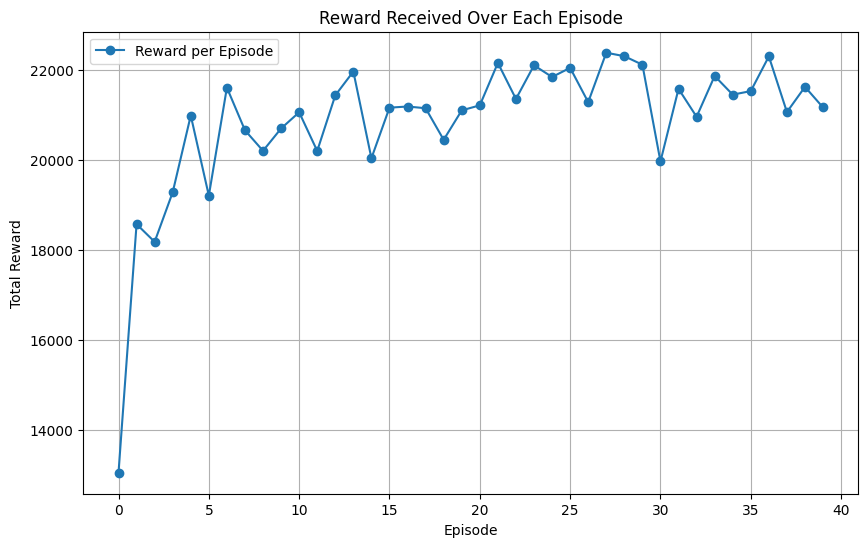

In [6]:

# Initialize the environment and strategy
env = pricing_env.PricingEnvironment(render_mode="text", is_continuous=False, product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)

strategy = MarkovDecisionProcess(action_strategy_config['action_probabilities'],epsilon=0.1)

episode_rewards = []

for episode in range(num_episodes):
    initial_state = env.reset()
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = strategy.choose_action()
        external_demand = np.random.uniform(0.5, 1.5)  # Simulate external market demand
        state, reward, done, _ = env.step(action, external_demand)
        strategy.update_probabilities(action, reward)  # Update the strategy based on the reward
        
        total_reward += reward
        if done:
            break

    #print(f"Episode {episode + 1}: Total Reward = {total_reward}")
    episode_rewards.append(total_reward)

# Visualization after completing all episodes
visualise_episode_rewards(episode_rewards)



### Q Learning Agent 

In [7]:
boundaries = [0.3, 0.6, 0.9, 1.2]  # Define boundaries for market demand bins
market_demand = 0.75  # Current market demand

# Encode the current market demand
state = encode_state(market_demand, boundaries)
print("Encoded state:", state)

Encoded state: 2


Episode 1: Total Reward = 9488.617238952937
Episode 2: Total Reward = 7277.76883044266
Episode 3: Total Reward = 7535.460831234606
Episode 4: Total Reward = 9362.722836528026
Episode 5: Total Reward = 8327.486860005392
Episode 6: Total Reward = 13749.750280269425
Episode 7: Total Reward = 8589.908824283979
Episode 8: Total Reward = 12744.034153025028
Episode 9: Total Reward = 10945.588069730467
Episode 10: Total Reward = 16097.593771368716
Episode 11: Total Reward = 11447.149556320202
Episode 12: Total Reward = 9039.940042428923
Episode 13: Total Reward = 14530.223063602549
Episode 14: Total Reward = 18514.05103056258
Episode 15: Total Reward = 10895.271326921273
Episode 16: Total Reward = 15367.036344114269
Episode 17: Total Reward = 15892.560941076748
Episode 18: Total Reward = 15410.690081337156
Episode 19: Total Reward = 17074.08620943846
Episode 20: Total Reward = 17838.749890306823
Episode 21: Total Reward = 18848.165621275075
Episode 22: Total Reward = 15136.494038586143
Episode

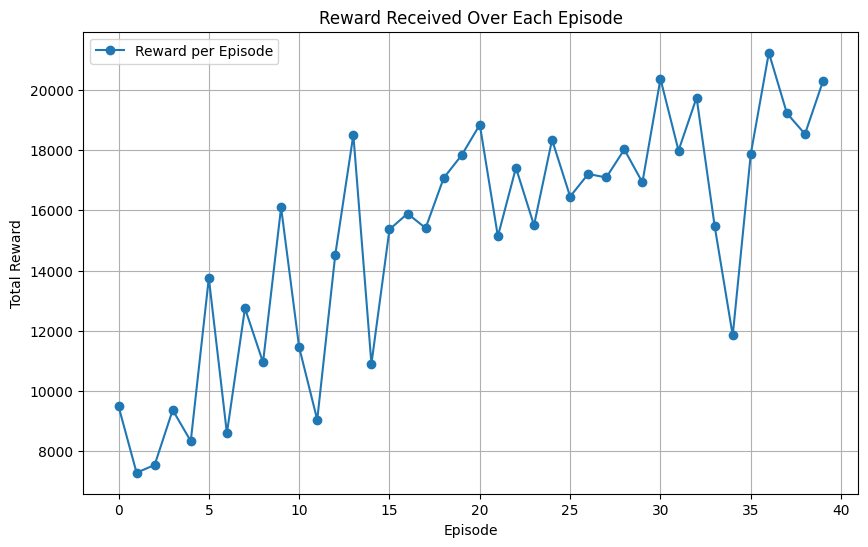

In [8]:

# Initialize the environment with the configs
env = pricing_env.PricingEnvironment(render_mode="text", is_continuous=False, product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)

# Initialize the Q-learning agent
# Assuming state_size is determined by your environment's specifics
agent = QLearningAgent(state_size=15, action_size=5)

num_episodes = 40
max_steps_per_episode = 250

episode_rewards = []
for episode in range(num_episodes):
    initial_state = env.reset()
    market_demand = initial_state[0]  # Extract market demand from the state
    state = encode_state(market_demand, boundaries=boundaries)  # Encode the initial state
    
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        action = agent.act(state)
        next_state_info, reward, done, _ = env.step(action, external_demand_function())  # Simulate action and external demand
        next_market_demand = next_state_info[0]  # Extract market demand from the next state TODO 
        next_state = encode_state(next_market_demand, boundaries=boundaries)  # Encode the next state

        agent.update(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
        

        if done:
            break
 
    agent.exploration_rate = max(agent.min_exploration_rate, agent.exploration_rate * agent.exploration_decay)
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")
        

    episode_rewards.append(total_reward)   

# Visualization after completing all episodes
visualise_episode_rewards(episode_rewards)


### SARSA

In [9]:
# Initialize the SARSA agent
agent = SARSA(state_size=15, action_size=5)

Episode 1: Total Reward = 12483.754353202903
Episode 2: Total Reward = 9475.617510923934
Episode 3: Total Reward = 9914.49943678351
Episode 4: Total Reward = 6471.500610749784
Episode 5: Total Reward = 6638.869947738701
Episode 6: Total Reward = 12680.66127938367
Episode 7: Total Reward = 9350.039867406029
Episode 8: Total Reward = 12976.119021945286
Episode 9: Total Reward = 10848.28390245945
Episode 10: Total Reward = 14124.722823038424
Episode 11: Total Reward = 14060.21557362711
Episode 12: Total Reward = 9477.485134026707
Episode 13: Total Reward = 14419.644256339256
Episode 14: Total Reward = 12328.055812334822
Episode 15: Total Reward = 15004.771755846961
Episode 16: Total Reward = 16089.050681758947
Episode 17: Total Reward = 16240.491240309855
Episode 18: Total Reward = 14741.455072583252
Episode 19: Total Reward = 12726.387963486975
Episode 20: Total Reward = 16171.759897296695
Episode 21: Total Reward = 16523.52542895852
Episode 22: Total Reward = 13559.32177616081
Episode 2

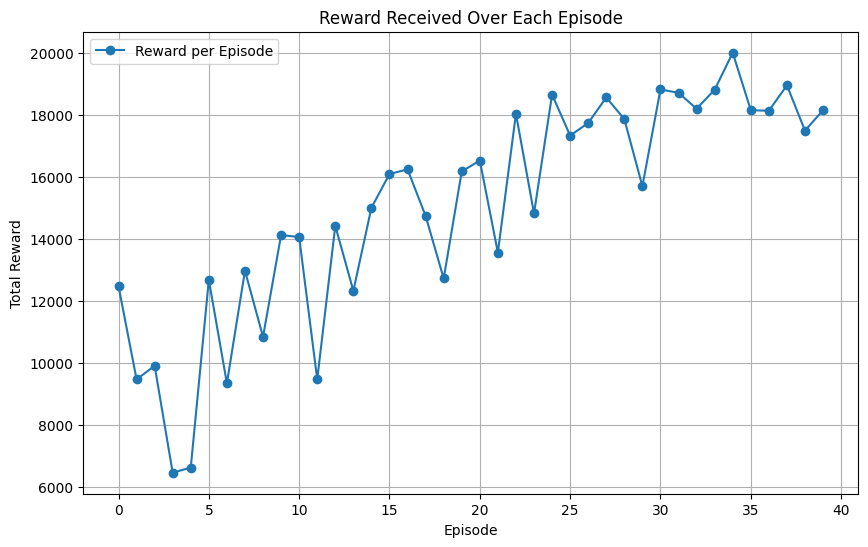

In [10]:
num_episodes = 40
max_steps_per_episode = 250
episode_rewards = []

for episode in range(num_episodes):
    initial_state = env.reset()
    market_demand = initial_state[0]
    state = encode_state(market_demand, boundaries=boundaries)
    
    total_reward = 0
    action = agent.choose_action(state)  # Initial action

    for step in range(max_steps_per_episode):
        next_state_info, reward, done, _ = env.step(action, external_demand_function())
        next_market_demand = next_state_info[0]
        next_state = encode_state(next_market_demand, boundaries=boundaries)
        next_action = agent.choose_action(next_state)  # Next action chosen by the policy
        
        # Update using the chosen next action
        agent.update(state, action, reward, next_state, next_action, done)
        
        state = next_state
        action = next_action  # Update action
        total_reward += reward
        
        if done:
            break

    agent.exploration_rate = max(agent.min_exploration_rate, agent.exploration_rate * agent.exploration_decay)
    episode_rewards.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Visualization after completing all episodes
visualise_episode_rewards(episode_rewards)

### Upper Confidence Bound

Episode 0: Finished with total reward: 280170.4799484114
Episode 1: Finished with total reward: 605181.9565289194
Episode 2: Finished with total reward: 495197.95652891934
Episode 3: Finished with total reward: 523723.95652891934
Episode 4: Finished with total reward: 529885.9565289194
Episode 5: Finished with total reward: 580478.9565289194
Episode 6: Finished with total reward: 536207.9565289195
Episode 7: Finished with total reward: 569233.9565289194
Episode 8: Finished with total reward: 572662.9565289194
Episode 9: Finished with total reward: 495473.95652891934
Episode 10: Finished with total reward: 592536.9565289193
Episode 11: Finished with total reward: 490914.95652891934
Episode 12: Finished with total reward: 522592.95652891934
Episode 13: Finished with total reward: 567101.9565289194
Episode 14: Finished with total reward: 532879.9565289194
Episode 15: Finished with total reward: 484271.95652891934
Episode 16: Finished with total reward: 533615.9565289194
Episode 17: Finish

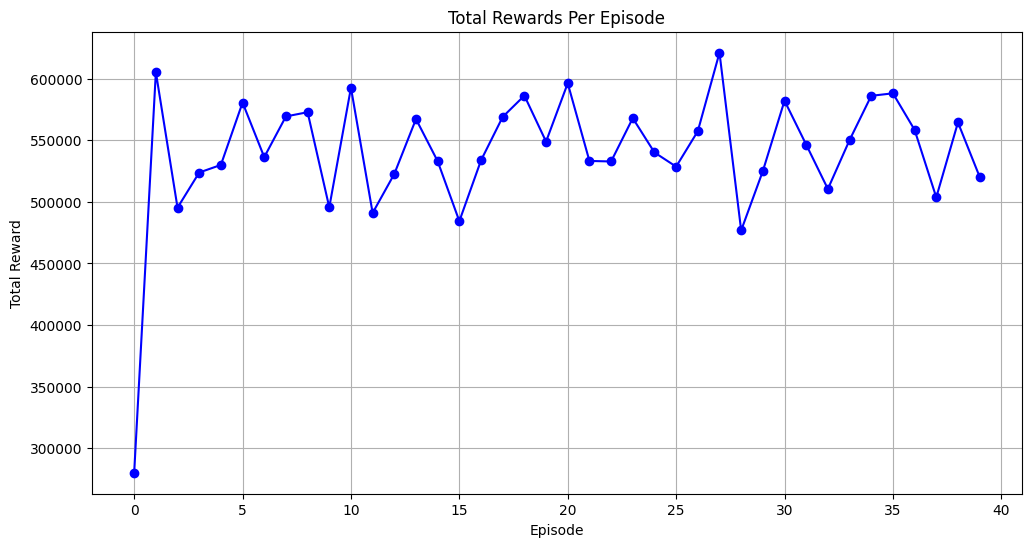

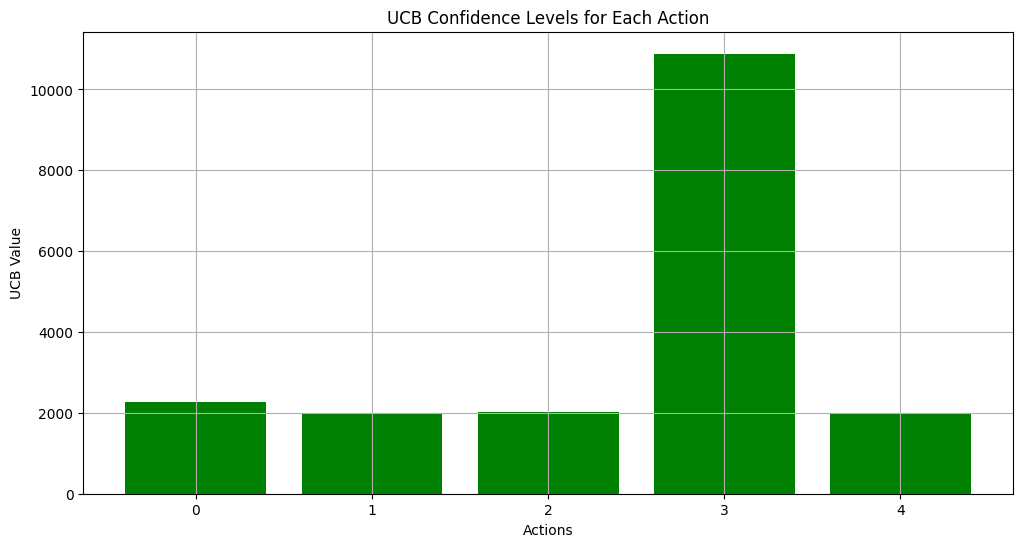

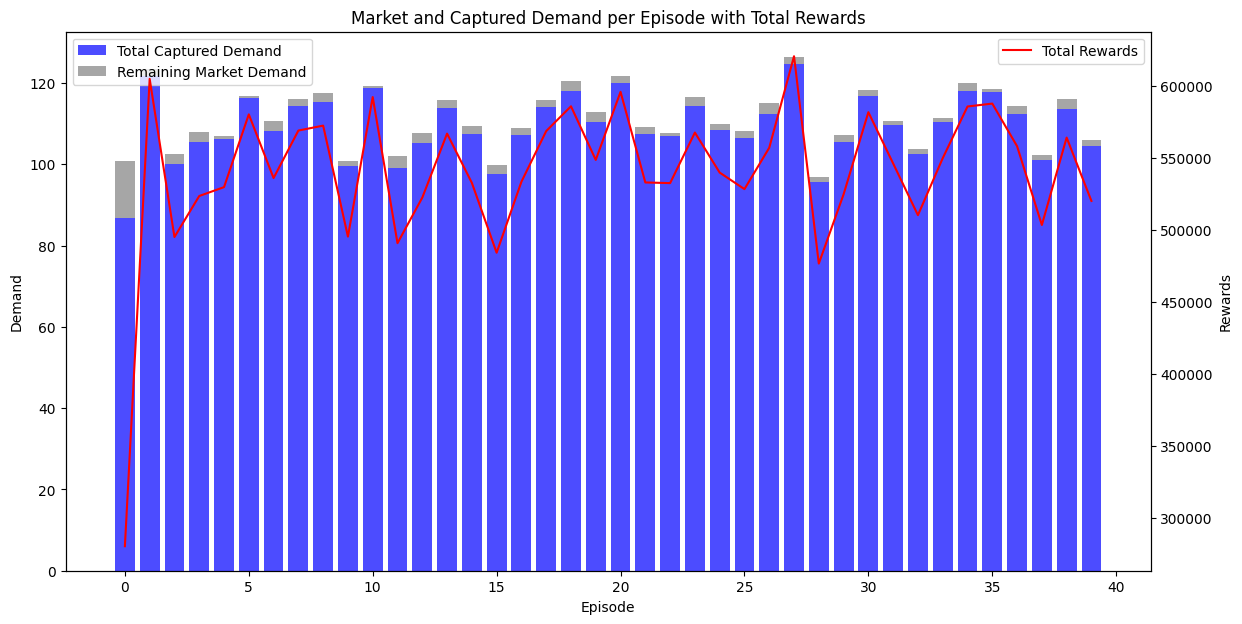

In [11]:

demand_generator = demand_calculator.DemandDataGenerator(low=10, high=200, steps=100, seasonality=True)

price_change_map = {
    0: -10,  # Decrease significantly
    1: -5,   # Decrease slightly
    2: 0,    # Keep price
    3: 15,    # Increase slightly
    4: 10    # Increase significantly
}

env = pricing_env.PricingEnvironment(render_mode="text", is_continuous=True, product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)

ucb_agent = UCB(len(price_change_map), exploration_coefficient=2)

# Simulation parameters
num_episodes = 40
max_steps_per_episode = 50
episode_rewards = []
total_market_demands = []
total_captured_demands = []

for episode in range(num_episodes):
    total_reward = 0
    market_demands = []
    captured_demands = []
    state = env.reset()
    demand_data = demand_generator.generate()  # Generate demand data for the whole episode

    for step in range(max_steps_per_episode):
        action = ucb_agent.select_action()
        price_change = price_change_map[action]
        current_price = np.clip(state[1] + price_change, env.min_price, env.max_price)

        demand = demand_data[step % len(demand_data)]
        next_state, reward, done, _ = env.step(current_price, demand)
        ucb_agent.update(action, reward)

        total_reward += reward
        market_demands.append(demand)
        captured_demands.append(next_state[0])  # Assuming this index contains captured demand
        state = next_state
        
        if done or step == max_steps_per_episode - 1:
            break

    episode_rewards.append(total_reward)
    total_market_demands.append(np.mean(market_demands))
    total_captured_demands.append(np.mean(captured_demands))
    print(f"Episode {episode}: Finished with total reward: {total_reward}")



# Assume episode_rewards and ucb_agent are defined from your UCB simulation run
visualise_total_rewards_ucb(episode_rewards)
visualise_ucb_confidence(ucb_agent)
visualise_ucb_demand_rewards(num_episodes, total_market_demands, total_captured_demands, episode_rewards)

### Soft Actor Critic Agent

In [12]:


import random
random.seed(42)
np.random.seed(42)


In [13]:
import torch

# Check if CUDA (GPU support) is available and choose accordingly
device = torch.device("cpu")


import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal


In [14]:


class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, max_action):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.mean = nn.Linear(256, action_dim)
        self.log_std = nn.Linear(256, action_dim)
        self.max_action = max_action

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        mean = self.mean(x)
        log_std = self.log_std(x)
        std = torch.exp(log_std)  # Standard deviation must be positive
        return mean, std

    def sample(self, state):
        mean, std = self(state)
        normal = torch.distributions.Normal(mean, std)
        z = normal.rsample()  # for reparameterization trick (mean + std * N(0,1))
        action = torch.tanh(z) * self.max_action
        return action

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim + action_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )
    
    def forward(self, state, action):
        sa = torch.cat([state, action], 1)
        return self.network(sa)

class SACAgent:
    def __init__(self, state_dim, action_dim, max_action, device):
        self.device = device
        self.actor = Actor(state_dim, action_dim, max_action).to(device)
        self.critic1 = Critic(state_dim, action_dim).to(device)
        self.critic2 = Critic(state_dim, action_dim).to(device)
        self.critic1_target = Critic(state_dim, action_dim).to(device)
        self.critic2_target = Critic(state_dim, action_dim).to(device)
        self.critic1_target.load_state_dict(self.critic1.state_dict())
        self.critic2_target.load_state_dict(self.critic2.state_dict())

        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=3e-4)
        self.critic1_optimizer = optim.Adam(self.critic1.parameters(), lr=3e-4)
        self.critic2_optimizer = optim.Adam(self.critic2.parameters(), lr=3e-4)
        self.discount = 0.99
        self.tau = 0.005
        self.policy_delay = 2

    def select_action(self, state):
        state = torch.FloatTensor(state.reshape(1, -1)).to(self.device)
        action = self.actor.sample(state)
        return action.cpu().data.numpy().flatten()

    def save_model(self, filename):
        torch.save({
            'actor_state_dict': self.actor.state_dict(),
            'critic1_state_dict': self.critic1.state_dict(),
            'critic2_state_dict': self.critic2.state_dict(),
            'critic1_target_state_dict': self.critic1_target.state_dict(),
            'critic2_target_state_dict': self.critic2_target.state_dict(),
            'actor_optimizer_state_dict': self.actor_optimizer.state_dict(),
            'critic1_optimizer_state_dict': self.critic1_optimizer.state_dict(),
            'critic2_optimizer_state_dict': self.critic2_optimizer.state_dict(),
        }, filename)

    def load_model(self, filename):
        checkpoint = torch.load(filename)
        self.actor.load_state_dict(checkpoint['actor_state_dict'])
        self.critic1.load_state_dict(checkpoint['critic1_state_dict'])
        self.critic2.load_state_dict(checkpoint['critic2_state_dict'])
        self.critic1_target.load_state_dict(checkpoint['critic1_target_state_dict'])
        self.critic2_target.load_state_dict(checkpoint['critic2_target_state_dict'])
        self.actor_optimizer.load_state_dict(checkpoint['actor_optimizer_state_dict'])
        self.critic1_optimizer.load_state_dict(checkpoint['critic1_optimizer_state_dict'])
        self.critic2_optimizer.load_state_dict(checkpoint['critic2_optimizer_state_dict'])
        self.actor.to(self.device)
        self.critic1.to(self.device)
        self.critic2.to(self.device)
        self.critic1_target.to(self.device)
        self.critic2_target.to(self.device)

    def train(self, replay_buffer, batch_size=256):
        for it in range(batch_size):
            # Sample a batch of transitions from the replay buffer
            state, action, next_state, reward, done = replay_buffer.sample(batch_size)
            state = torch.FloatTensor(state).to(self.device)
            action = torch.FloatTensor(action).to(self.device)
            next_state = torch.FloatTensor(next_state).to(self.device)
            reward = torch.FloatTensor(reward).to(self.device)
            done = torch.FloatTensor(done).to(self.device)

            # Compute the target Q value
            with torch.no_grad():
                next_action = self.actor.sample(next_state)
                target_Q1 = self.critic1_target(next_state, next_action)
                target_Q2 = self.critic2_target(next_state, next_action)
                target_Q = torch.min(target_Q1, target_Q2)
                target_Q = reward + ((1 - done) * self.discount * target_Q)

            # Get current Q estimates
            current_Q1 = self.critic1(state, action)
            current_Q2 = self.critic2(state, action)

            # Compute critic loss
            critic_loss = F.mse_loss(current_Q1, target_Q) + F.mse_loss(current_Q2, target_Q)

            # Optimize the critic
            self.critic1_optimizer.zero_grad()
            self.critic2_optimizer.zero_grad()
            critic_loss.backward()
            self.critic1_optimizer.step()
            self.critic2_optimizer.step()

            # Delayed policy updates
            if it % self.policy_delay == 0:
                # Compute actor loss
                actor_loss = -self.critic1(state, self.actor.sample(state)).mean()

                # Optimize the actor
                self.actor_optimizer.zero_grad()
                actor_loss.backward()
                self.actor_optimizer.step()

                # Soft update the target networks
                for param, target_param in zip(self.critic1.parameters(), self.critic1_target.parameters()):
                    target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

                for param, target_param in zip(self.critic2.parameters(), self.critic2_target.parameters()):
                    target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)


In [15]:
# Assuming the environment is already imported and initialized
env = pricing_env.PricingEnvironment(render_mode="text", is_continuous=True, product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)


In [16]:

# Initialize the SAC Agent
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] if env.is_continuous else env.action_space.n
max_action = env.action_space.high[0] if env.is_continuous else 1


In [17]:
agent = SACAgent(state_dim, action_dim, max_action, device)

In [18]:
agent.load_model('sac_agent.pth')

In [19]:
max_steps_per_episode = 250 
demand_generator = pricing_env.DemandDataGenerator(
    low=demand_calculator_config['low'],
    high=demand_calculator_config['high'],
    steps=max_steps_per_episode,
    seasonality=True
)



In [20]:
from utils import visualise_sac_test_rewards

Test Episode 0: Total Reward = 713245.3350130375
Test Episode 1: Total Reward = 702897.7414580921
Test Episode 2: Total Reward = 699765.6809366951
Test Episode 3: Total Reward = 677090.511507903
Test Episode 4: Total Reward = 734669.5521781116
Test Episode 5: Total Reward = 706152.666439193
Test Episode 6: Total Reward = 669376.8950612814
Test Episode 7: Total Reward = 668941.92010998
Test Episode 8: Total Reward = 665550.2199696572
Test Episode 9: Total Reward = 717758.6416670891
Test Episode 10: Total Reward = 757821.6775006971
Test Episode 11: Total Reward = 659533.8849853375
Test Episode 12: Total Reward = 707812.6158565957
Test Episode 13: Total Reward = 667460.1521103155
Test Episode 14: Total Reward = 691482.9790287995
Test Episode 15: Total Reward = 692245.288946077
Test Episode 16: Total Reward = 748596.7845098937
Test Episode 17: Total Reward = 835911.7183807289
Test Episode 18: Total Reward = 681355.4655879592
Test Episode 19: Total Reward = 647914.8977713389
Test Episode 20

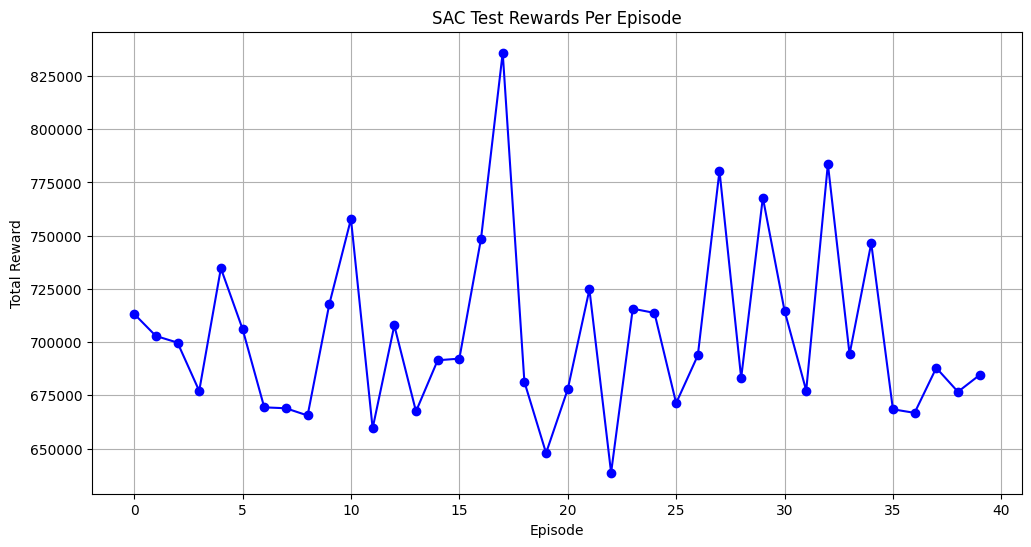

In [21]:
# Test the loaded agent
num_test_episodes = 40
test_rewards = []
max_steps_per_episode=250


for episode in range(num_test_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    step = 0

    while not done and step < max_steps_per_episode:
        action = agent.select_action(state)  # Select action without exploration
        demand = demand_generator.generate()[step % demand_generator.steps]
        next_state, reward, done, _ = env.step(action, demand)
        total_reward += reward
        state = next_state
        step += 1

    test_rewards.append(total_reward)
    print(f"Test Episode {episode}: Total Reward = {total_reward}")

visualise_sac_test_rewards(test_rewards)

In [22]:
agent.actor.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 7.1278e-02, -1.2746e-01],
                      [ 6.4747e-01, -6.2259e-01],
                      [-5.7356e-01,  7.3479e-02],
                      [ 1.8529e-01, -6.8886e-01],
                      [ 5.5104e-01,  2.1881e-01],
                      [-1.5089e-01, -6.2184e-01],
                      [-5.0598e-01, -5.3441e-01],
                      [ 4.3275e-01,  2.8144e-01],
                      [ 2.7233e-01,  5.9100e-01],
                      [-2.0790e-02, -4.4258e-01],
                      [-4.1135e-01, -5.8648e-01],
                      [ 1.0394e-01, -6.8362e-01],
                      [-1.0105e-01,  6.0400e-01],
                      [ 1.6376e-01, -9.7533e-02],
                      [ 6.7984e-03, -2.5708e-01],
                      [ 4.0500e-01, -3.1925e-01],
                      [-2.5767e-01,  3.9309e-01],
                      [-6.3977e-01,  6.9111e-01],
                      [-9.5234e-02,  2.8071e-01],
                      